# Titanic Dataset

## Logistic Regression with Python

### The titanic dataset has been taken [Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set. I will be performing necessary EDA, Data Cleaning and classification modelling including prediction score

## Import relevant Libraries for dataframe and plotting

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### read file through pandas

In [292]:
df_dataset=pd.read_csv(r"D:\CVS\Learning\Kaggle\Data_Cleaning\EDA\titanic_train.csv",encoding='utf-8')

In [293]:
pd.pandas.set_option('display.max_columns',None)

### read the first 20 lines

In [294]:
df_dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# EDA

### Let's perform the exploratory data analysis

### Let's start by perfoming simple steps which include understanding the shape and description of the dataset

In [295]:
df_dataset.shape

(891, 12)

In [296]:
## to check the basic stats of the dataset
df_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [297]:
# to check what columns has what type of values and how many are null
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Age  and cabin column have missing values based on initial inspection. Let's explore more and see other columns in a heat map as if columns number increase those will not be shown here

In [299]:
# take out count for null cells column wise
df_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### In General, as seen from above, the data quality issues can be seen with respect to missing values

<Axes: >

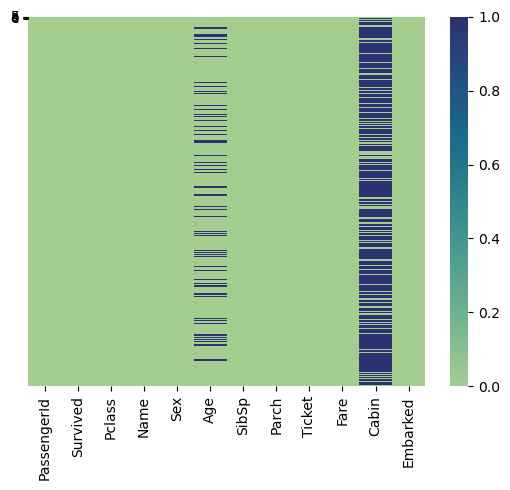

In [300]:
sns.heatmap(df_dataset.isnull(),yticklabels='False',cmap='crest')

### Clearly Age and Cabin have missing values. Leaving for later

### Understanding from the perspective of categorical and continous columns
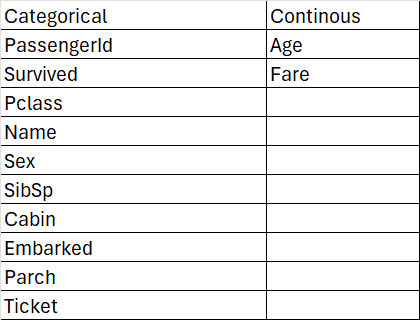



### Visualisations

### Categorical features can be best understood using a bargraph. Therefore, following visualisations are in line with those

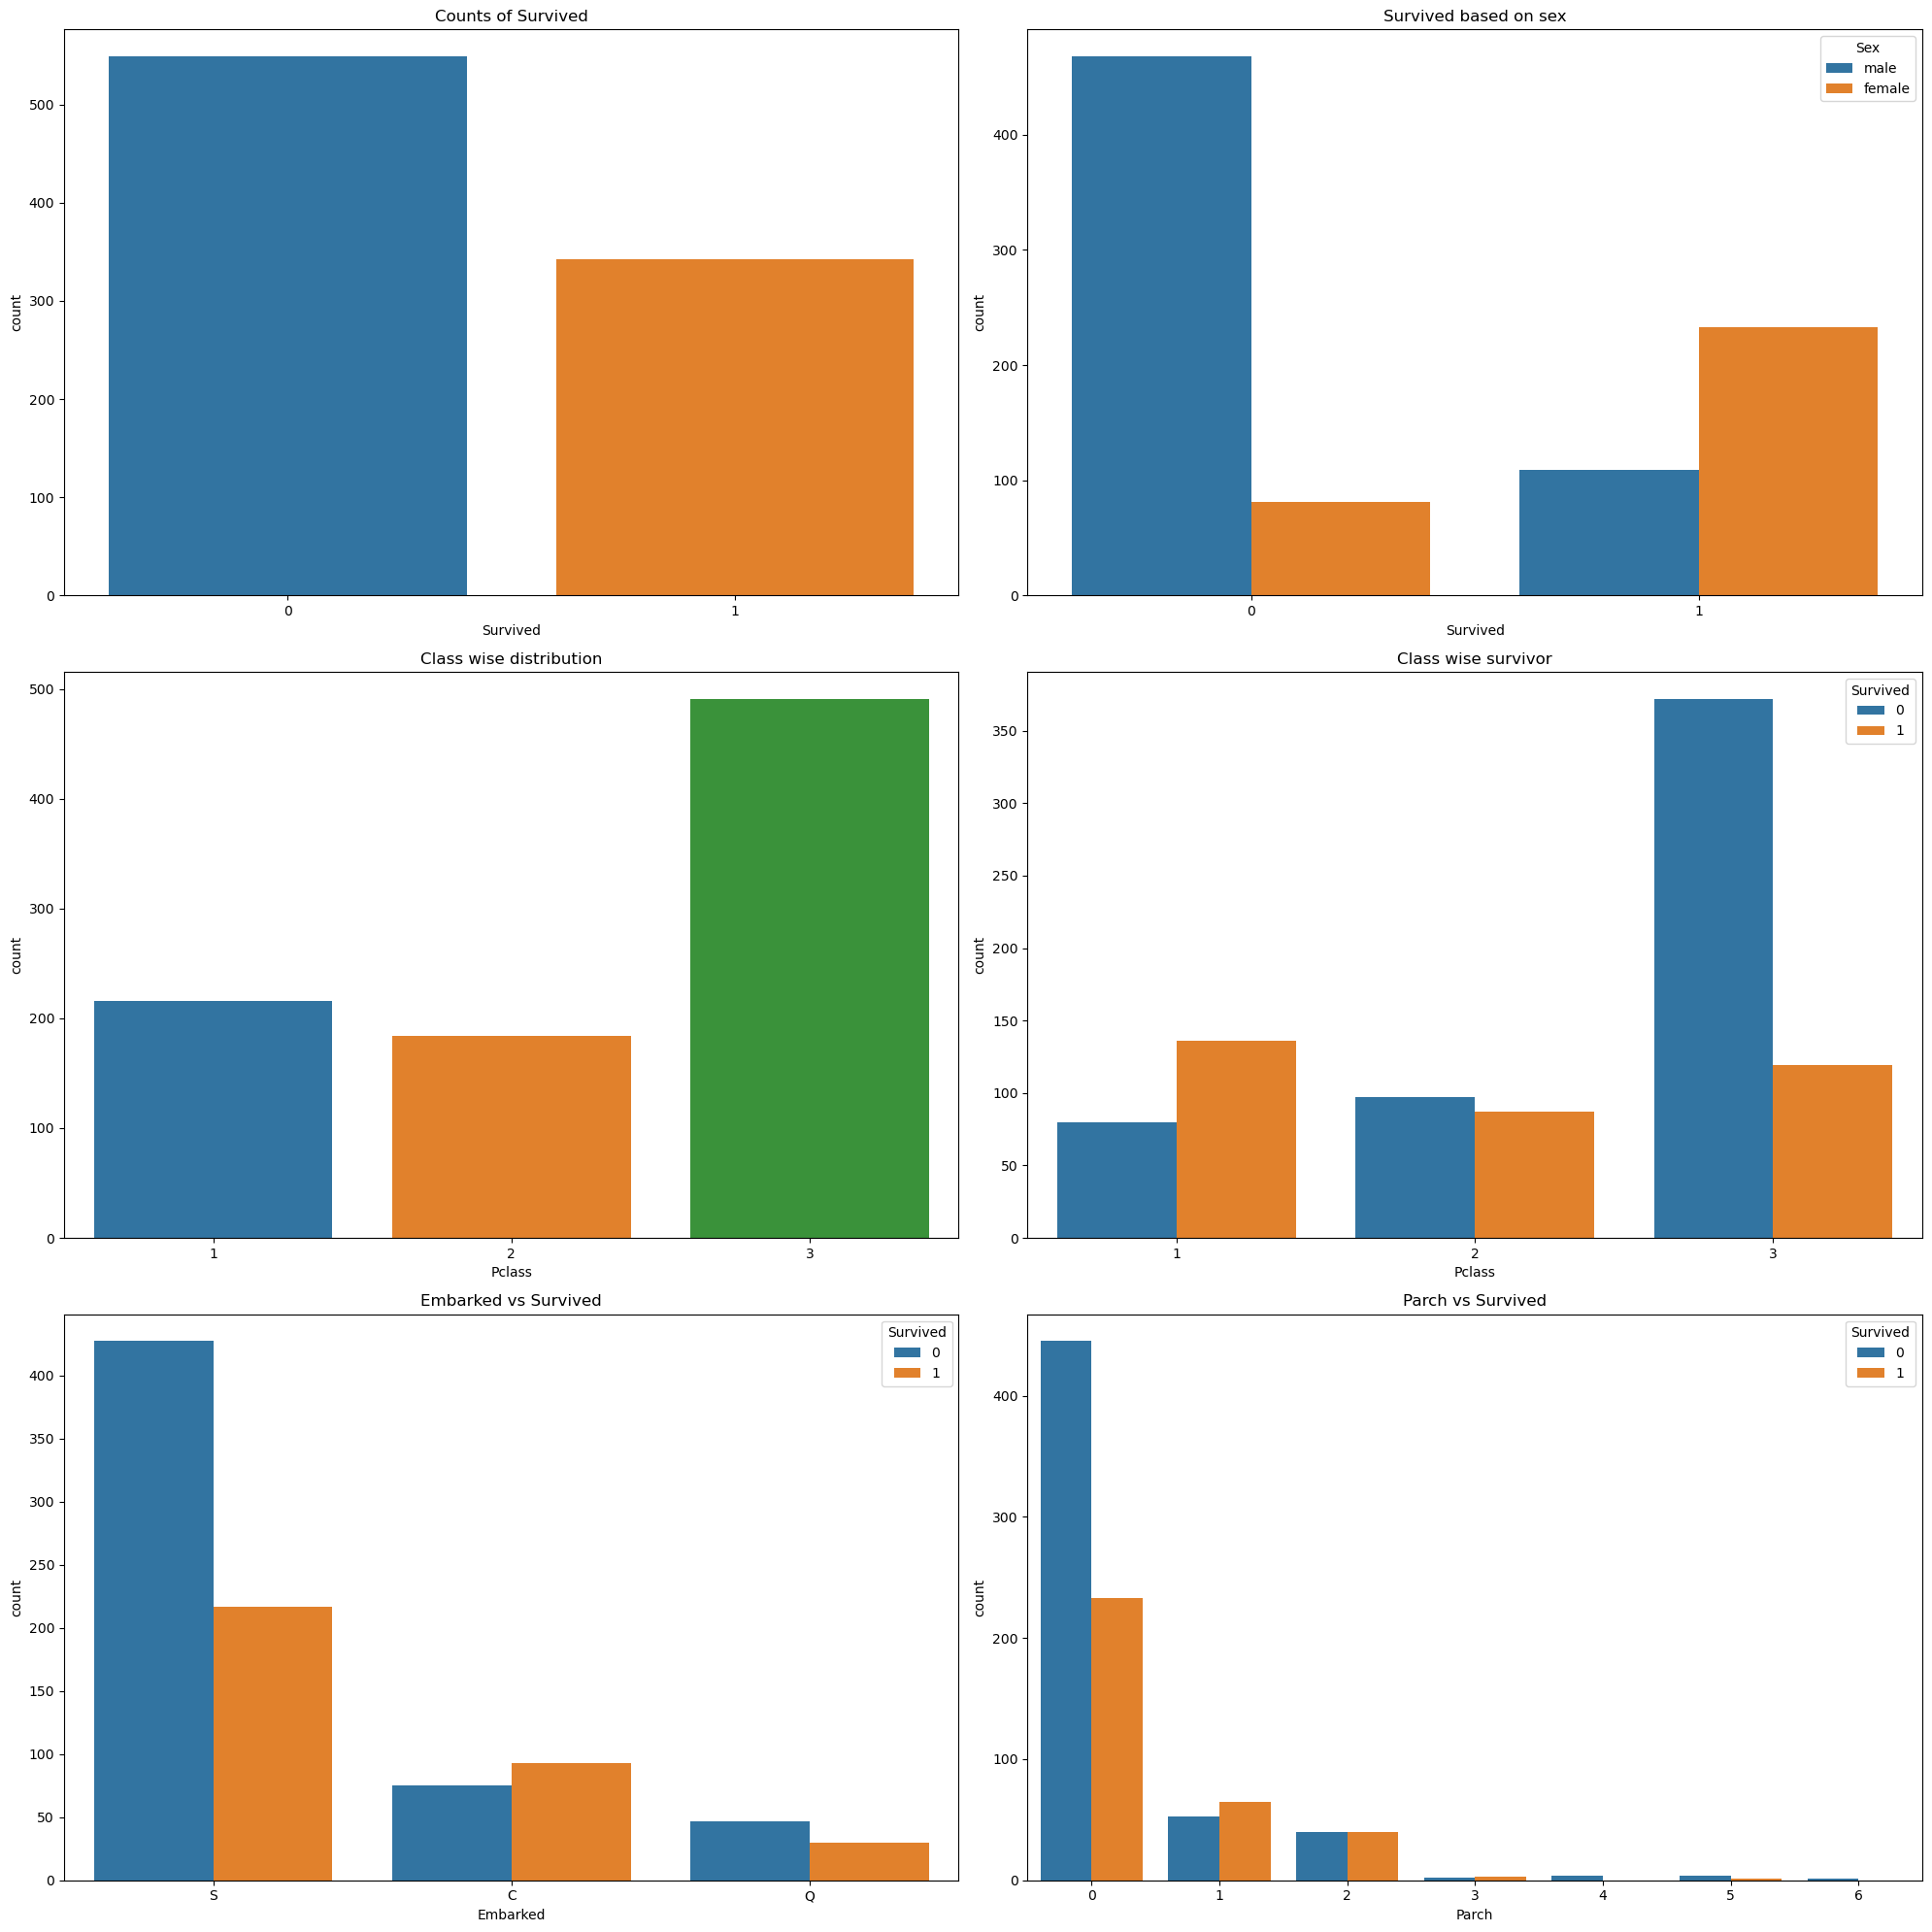

In [301]:

fig, axes=plt.subplots(3,2,figsize=(20,20))

#Survived count
sns.countplot(x='Survived', data=df_dataset,ax=axes[0,0])
axes[0,0].set_title('Counts of Survived')

# comparison of two categorical columns, survived vs sex
sns.countplot(x='Survived',hue='Sex', data=df_dataset,ax=axes[0,1])
axes[0,1].set_title('Survived based on sex')

# Pclass count
sns.countplot(x='Pclass',data=df_dataset,ax=axes[1,0])
axes[1,0].set_title('Class wise distribution')

#comparison of two categorical columns, survived vs Pclass
sns.countplot(x='Pclass',hue='Survived',data=df_dataset,ax=axes[1,1])
axes[1,1].set_title('Class wise survivor')

#comparison of two categorical columns, survived vs Embarked
sns.countplot(x='Embarked',hue='Survived',data=df_dataset,ax=axes[2,0])
axes[2,0].set_title('Embarked vs Survived')

#comparison of two categorical columns, survived vs Parch
sns.countplot(x='Parch',hue='Survived',data=df_dataset,ax=axes[2,1])
axes[2,1].set_title('Parch vs Survived')

plt.tight_layout()
plt.show()

#### From the above visualisations, following points are clear
#### 1. approximately 300 people survived while rest did not
#### 2. There were more female survivors
#### 3. Pclass3 had most people and least survivors in comparison to other classes


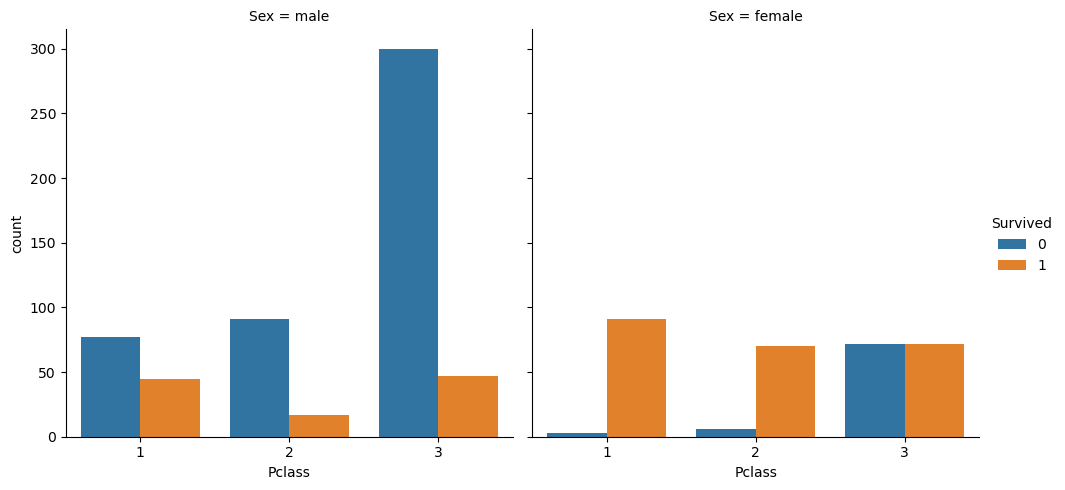

In [302]:
sns.catplot(x='Pclass',hue='Survived',col='Sex',data=df_dataset,kind='count')
plt.show()

### Above catplot compares Pclass Males and Female. As it can be seen that for Pclass3 there were least surviving men, however, for women this ratio was almost equal for the same class. Whereas, most number of women survivors are from Pclass1. 

<Axes: xlabel='SibSp', ylabel='count'>

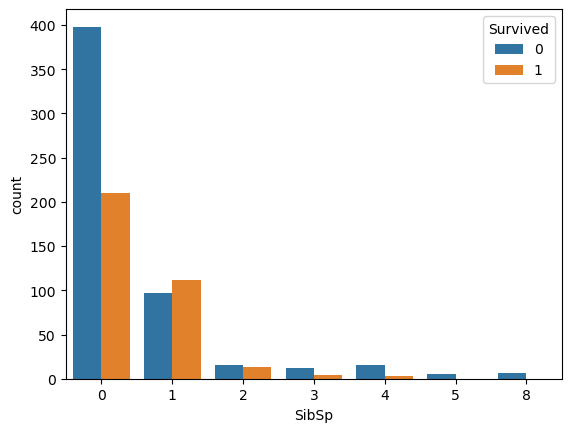

In [303]:
sns.countplot(x='SibSp',hue='Survived',data=df_dataset)

### we have almost compared all categorical features. For continous features, the best way to understand distribution is through histograms which are shown below 

<Axes: >

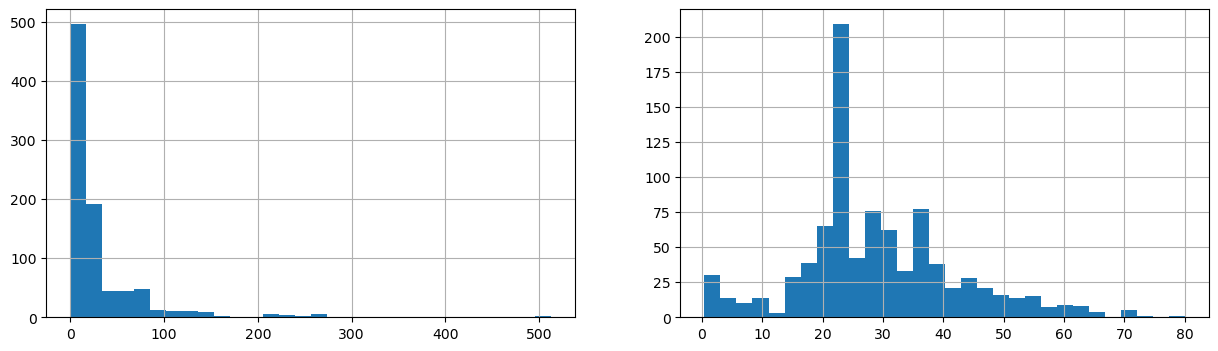

In [371]:
fig, axes =plt.subplots(1,2, figsize=(15,4))
df_dataset['Fare'].hist(bins=30,ax=axes[0])
df_dataset['Age'].hist(bins=30,ax=axes[1])

### Above histograms show skewness in data set which is expected due to the nature of data in the dataset 

### Next, continous and categorical features should be compared. A good way to compare those is boxplots. Additionally, we have analysed rest of the data. We need to impute Age column as well. This will help us in making a decision.

<Axes: xlabel='Pclass', ylabel='Age'>

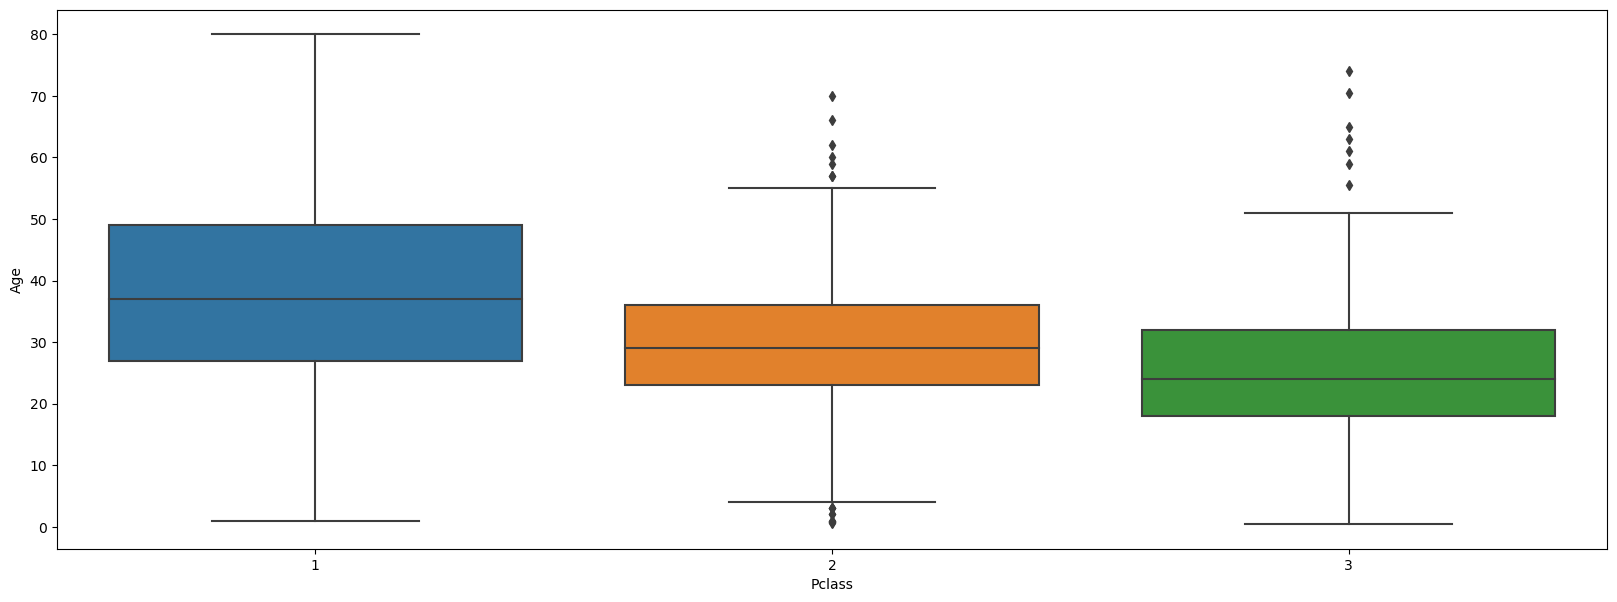

In [306]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Pclass', y='Age',data=df_dataset)

### From the boxplots, it can be seen that Pclass 1 has a higher median age and median age is varying across the passenger classes. We can use this and try to impute Age col missing values with median based on Pclasses

In [307]:
pclass1medianAge=df_dataset[df_dataset['Pclass']==1]['Age'].median()
pclass2medianAge=df_dataset[df_dataset['Pclass']==2]['Age'].median()
pclass3medianAge=df_dataset[df_dataset['Pclass']==3]['Age'].median()


In [308]:
# Fuction to impute Age
def imputeagebymedian(Age,Pclass):
    if pd.isnull(Age):
        if Pclass==1:
            return pclass1medianAge
        elif Pclass==2:
            return pclass2medianAge
        else:
            return pclass3medianAge
    else:
        return Age
    

In [309]:
# apply function 
df_dataset['Age'] = df_dataset.apply(lambda row: imputeagebymedian(row['Age'], row['Pclass']), axis=1)

### Drop non value adding categorical column Cabin

In [312]:
df_dataset.drop('Cabin',axis=1,inplace=True)

In [313]:
df_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Since ML can't understand things other than numbers, it is relevant to convert Sex and Embark cols into binary by hot code encoding using dummies.

In [314]:
# creat and convert dummies for sex values 
sex=pd.get_dummies(df_dataset['Sex'],drop_first=True)

In [315]:
# creat and convert dummies for embarked values
embarked=pd.get_dummies(df_dataset['Embarked'],drop_first=True)

In [316]:
# drop columns which can not add value in predicting
df_dataset.drop(['Sex','PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [318]:
# concatenate dataset with sex and embarked dummies created above
df_dataset=pd.concat([df_dataset, sex,embarked],axis=1)

In [319]:
df_dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


### Finally it is pertinent to check relation ship between continous features. Scatterplot and correlation matrix will be used for the same

<Axes: xlabel='Age', ylabel='Fare'>

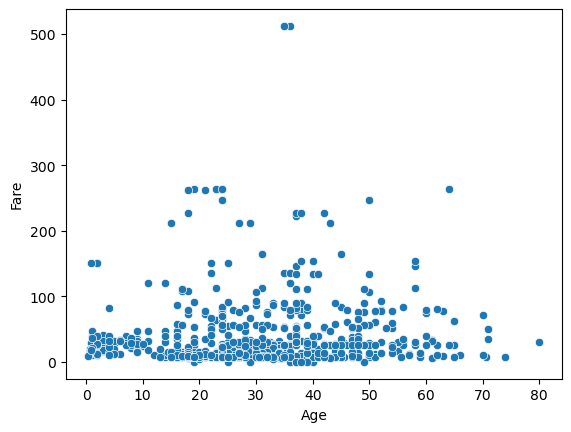

In [323]:
# A scatter plot
sns.scatterplot(x='Age', y='Fare',data=df_dataset)

#### A weak/no relationship is shown between Age and Fare, lets visuallize the same through correlation matrix below

<Axes: >

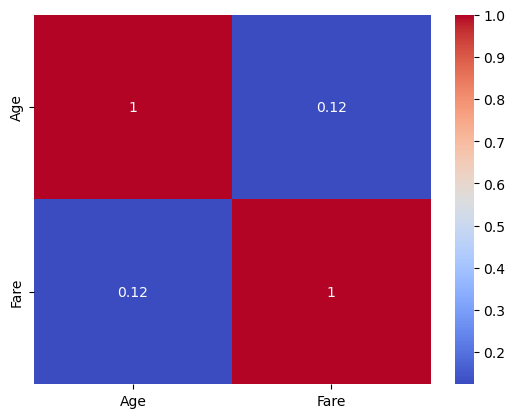

In [331]:
c=df_dataset[['Age','Fare']].corr()
sns.heatmap(c,annot=True,cmap='coolwarm')

### .12 is an indicator of weak relatioship which indicates that there is no influence of  these variables on each other

### Building a Logistic Regression model
Let's start by splitting our data into a training set and test set.

In [378]:
X=df_dataset.drop(['Survived'],axis=1)
y=df_dataset['Survived']

In [380]:
from sklearn.model_selection import train_test_split

In [381]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

### Here it is important to apply standard scaler on Age and fare to because their scales of measurement are different. hence, it will help to bring to all variable to same standard. 

In [382]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[['Age','Fare']])
X_train[['Age','Fare']]=scaler.transform(X_train[['Age','Fare']])
X_test[['Age','Fare']]=scaler.transform(X_test[['Age','Fare']])

In [383]:
#apply model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [384]:
prediction=model.predict(X_test)

In [385]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,prediction)
accuracy

array([[137,  20],
       [ 30,  81]], dtype=int64)

In [386]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,prediction)
accuracy

0.8134328358208955

## Evaluate results through valid metrics

In [387]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

